In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
toy_df = pd.read_csv('./geodesic/toy_results.csv')
print(toy_df.head())
print(toy_df['method'].unique())

df2 = pd.read_csv('./geodesic_comparison.csv')
print(df2.head())
print(df2['method'].unique())

# merge the two dataframes
df = pd.concat([toy_df, df2], axis=0)

   Unnamed: 0          data_name      method      corr       mse  dist2geod
0           0  hemisphere_none_0        ours  0.985418  0.029196   0.006119
1           1  hemisphere_none_0  no density  0.889773  0.336188   0.066681
2           2  hemisphere_none_0     density  0.907905  0.292970   0.029276
3           0   ellipsoid_none_0        ours  0.970732  0.463778   0.030909
4           1   ellipsoid_none_0  no density  0.845562  2.448624   0.108429
['ours' 'no density' 'density']
          data_name         method        mse  pearson_corr     pearson_p  \
0  ellipsoid_10_0.1  diffusion_map  13.304359      0.806672  1.734284e-05   
1  ellipsoid_10_0.1       djikstra   5.141498      0.981658  2.088704e-14   
2  ellipsoid_10_0.1          phate  13.173511      0.966998  3.912822e-12   
3  ellipsoid_15_0.1  diffusion_map   9.699418      0.495753  2.622141e-02   
4  ellipsoid_15_0.1       djikstra   6.570650      0.957036  4.052025e-11   

   spearman_corr    spearman_p  
0       0.821053

In [5]:
print(toy_df.shape)
print(df2.shape)
print(df.shape)

(117, 6)
(144, 7)
(261, 10)


In [6]:
df

,Unnamed: 0,data_name,method,corr,mse,dist2geod,pearson_corr,pearson_p,spearman_corr,spearman_p
0,0.0,hemisphere_none_0,ours,0.985418,0.029196,0.006119,NaN,NaN,NaN,NaN
1,1.0,hemisphere_none_0,no density,0.889773,0.336188,0.066681,NaN,NaN,NaN,NaN
2,2.0,hemisphere_none_0,density,0.907905,0.292970,0.029276,NaN,NaN,NaN,NaN
3,0.0,ellipsoid_none_0,ours,0.970732,0.463778,0.030909,NaN,NaN,NaN,NaN
4,1.0,ellipsoid_none_0,no density,0.845562,2.448624,0.108429,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
139,NaN,torus_none_0.1,djikstra,NaN,0.406561,NaN,0.985577,2.434935e-15,0.980451,3.689359e-14
140,NaN,torus_none_0.1,phate,NaN,25.230882,NaN,0.920050,9.457724e-09,0.947368,2.429729e-10
141,NaN,torus_none_0,diffusion_map,NaN,13.469770,NaN,0.937872,1.044074e-09,0.888722,1.648527e-07
142,NaN,torus_none_0,djikstra,NaN,0.088025,NaN,0.996174,1.646743e-20,0.987970,4.798484e-16


In [7]:
# copy pearson_corr to corr if corr is nan
df['corr'] = df['corr'].fillna(df['pearson_corr'])
df

,Unnamed: 0,data_name,method,corr,mse,dist2geod,pearson_corr,pearson_p,spearman_corr,spearman_p
0,0.0,hemisphere_none_0,ours,0.985418,0.029196,0.006119,NaN,NaN,NaN,NaN
1,1.0,hemisphere_none_0,no density,0.889773,0.336188,0.066681,NaN,NaN,NaN,NaN
2,2.0,hemisphere_none_0,density,0.907905,0.292970,0.029276,NaN,NaN,NaN,NaN
3,0.0,ellipsoid_none_0,ours,0.970732,0.463778,0.030909,NaN,NaN,NaN,NaN
4,1.0,ellipsoid_none_0,no density,0.845562,2.448624,0.108429,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
139,NaN,torus_none_0.1,djikstra,0.985577,0.406561,NaN,0.985577,2.434935e-15,0.980451,3.689359e-14
140,NaN,torus_none_0.1,phate,0.920050,25.230882,NaN,0.920050,9.457724e-09,0.947368,2.429729e-10
141,NaN,torus_none_0,diffusion_map,0.937872,13.469770,NaN,0.937872,1.044074e-09,0.888722,1.648527e-07
142,NaN,torus_none_0,djikstra,0.996174,0.088025,NaN,0.996174,1.646743e-20,0.987970,4.798484e-16


In [8]:
df[df['data_name'].str.contains('_15_')].value_counts('data_name').sort_values()

data_name
ellipsoid_15_0       6
ellipsoid_15_0.5     6
ellipsoid_15_0.7     6
hemisphere_15_0      6
hemisphere_15_0.1    6
hemisphere_15_0.3    6
hemisphere_15_0.5    6
hemisphere_15_0.7    6
saddle_15_0          6
saddle_15_0.1        6
saddle_15_0.3        6
saddle_15_0.5        6
saddle_15_0.7        6
torus_15_0           6
torus_15_0.1         6
torus_15_0.3         6
torus_15_0.5         6
ellipsoid_15_0.1     6
ellipsoid_15_0.3     6
torus_15_0.7         6
Name: count, dtype: int64

In [9]:
# add column noise to each row
df['noise'] = df['data_name'].apply(lambda x: x.split('_')[-1])
df

,Unnamed: 0,data_name,method,corr,mse,dist2geod,pearson_corr,pearson_p,spearman_corr,spearman_p,noise
0,0.0,hemisphere_none_0,ours,0.985418,0.029196,0.006119,NaN,NaN,NaN,NaN,0
1,1.0,hemisphere_none_0,no density,0.889773,0.336188,0.066681,NaN,NaN,NaN,NaN,0
2,2.0,hemisphere_none_0,density,0.907905,0.292970,0.029276,NaN,NaN,NaN,NaN,0
3,0.0,ellipsoid_none_0,ours,0.970732,0.463778,0.030909,NaN,NaN,NaN,NaN,0
4,1.0,ellipsoid_none_0,no density,0.845562,2.448624,0.108429,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
139,NaN,torus_none_0.1,djikstra,0.985577,0.406561,NaN,0.985577,2.434935e-15,0.980451,3.689359e-14,0.1
140,NaN,torus_none_0.1,phate,0.920050,25.230882,NaN,0.920050,9.457724e-09,0.947368,2.429729e-10,0.1
141,NaN,torus_none_0,diffusion_map,0.937872,13.469770,NaN,0.937872,1.044074e-09,0.888722,1.648527e-07,0
142,NaN,torus_none_0,djikstra,0.996174,0.088025,NaN,0.996174,1.646743e-20,0.987970,4.798484e-16,0


    Unnamed: 0         data_name method      corr         mse  dist2geod  \
12         0.0    ellipsoid_15_0   ours  0.965849    1.971092   0.017144   
15         0.0  ellipsoid_15_0.1   ours  0.853877    1.114969   0.040748   
18         0.0  ellipsoid_15_0.3   ours  0.675694   18.187210   0.210245   
21         0.0  ellipsoid_15_0.5   ours  0.156603   64.057630   0.545529   
24         0.0  ellipsoid_15_0.7   ours  0.011587  150.746460   1.243493   

    pearson_corr  pearson_p  spearman_corr  spearman_p noise  
12           NaN        NaN            NaN         NaN     0  
15           NaN        NaN            NaN         NaN   0.1  
18           NaN        NaN            NaN         NaN   0.3  
21           NaN        NaN            NaN         NaN   0.5  
24           NaN        NaN            NaN         NaN   0.7  
cur noise:  0
cur noise:  0.1
cur noise:  0.3
cur noise:  0.5
cur noise:  0.7
ours ellipsoid corr 5 0.532722050053446
x:  ['0', '0.1', '0.3', '0.5', '0.7']
    Unnam

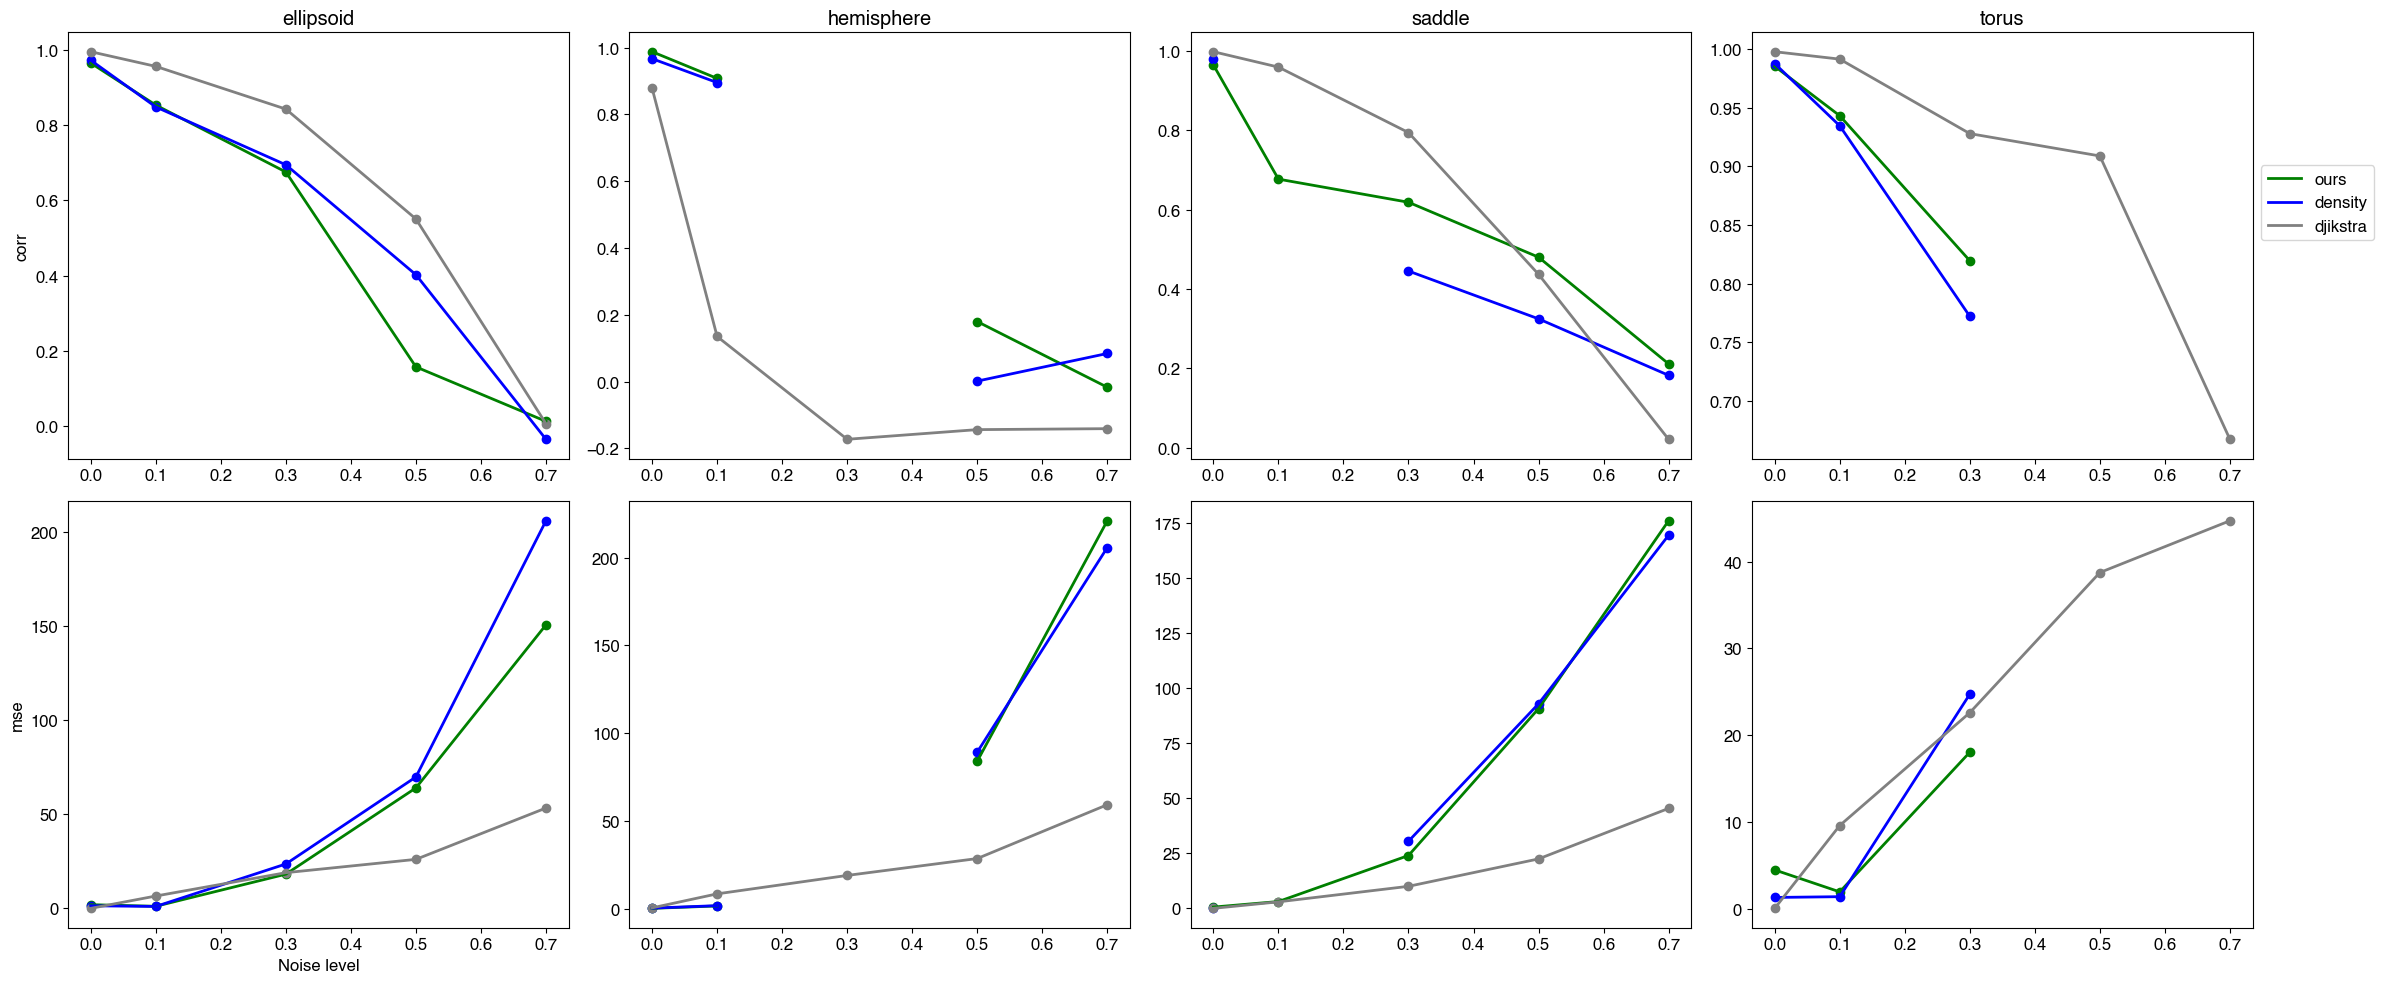

In [10]:
# Experiment 1: Increasing noise
# [elliposid, hemisphere,saddle,torus]_15_[0, 0.1, 0.3, 0.5, 0.7]
# each method is different color, each dataset is different line
# x-axis is noise level, y-axis is metric value

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 12

metric_names = ['corr', 'mse']
dnames = ['ellipsoid', 'hemisphere', 'saddle', 'torus']
n_rows = len(metric_names)
n_cols = len(dnames)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*5))
#colors = ['r', 'g', 'b', 'c']
colors =['g', 'r', 'b', 'gray', 'gray', 'gray']
#linestyle = ['-', '--', '-.', ':']
linestyle = ['-'] * 4

# label dataset on top
for i in range(0, n_cols):
    ax[0, i].set_title(dnames[i])

# label metric on the left
for j in range(0, n_rows):
    ax[j, 0].set_ylabel(metric_names[j])




for i, dname in enumerate(['ellipsoid', 'hemisphere', 'saddle', 'torus']):
    for j, method in enumerate(df['method'].unique()):
        if method in ['no density','phate', 'diffusion_map']:
            continue
        method_df = df[df['method'] == method]

        cur_df = method_df[method_df['data_name'].str.contains(dname+'_15_')]
        #print(cur_df)

        #noises = cur_df['name'].apply(lambda x: x.split('_')[-1]).sort_values().unique()
        noises = list(cur_df['data_name'].apply(lambda x: x.split('_')[-1]).sort_values())

        
        for k, metric in enumerate(metric_names):
            print(cur_df)
            ys = []
            for noise in noises:
                print('cur noise: ', noise)
                ys.append(cur_df[cur_df['noise'] == noise ][metric].mean())

            print(method, dname, metric, len(noises), np.mean(ys))
            if np.mean(ys) is np.nan:
                continue

            num_noise = 5
            x = np.array(noises).astype(float)[:num_noise]
            ys = np.array(ys)[:num_noise]
            # ys = ys - np.min(ys) if metric == 'mse' else ys

            print('x: ', noises)
            ax[k,i].scatter(x, ys, color=colors[j])
            ax[k,i].plot(x, ys, 
                       label=method, 
                       color=colors[j], linewidth=2)

print('Updating labels...')


# zoom in on the first 100 of the y-axis


#share legend for all plots, on the right side
ax[0, -1].legend(loc='center left', bbox_to_anchor=(1, 0.60))
ax[-1, 0].set_xlabel('Noise level')

plt.tight_layout()

plt.savefig('noise_level_geodesic.pdf')

In [11]:
# add column dim to each row
df['dim'] = df['data_name'].apply(lambda x:  x.split('_')[1] if  x.split('_')[1] != 'none' else 3)
df

,Unnamed: 0,data_name,method,corr,mse,dist2geod,pearson_corr,pearson_p,spearman_corr,spearman_p,noise,dim
0,0.0,hemisphere_none_0,ours,0.985418,0.029196,0.006119,NaN,NaN,NaN,NaN,0,3
1,1.0,hemisphere_none_0,no density,0.889773,0.336188,0.066681,NaN,NaN,NaN,NaN,0,3
2,2.0,hemisphere_none_0,density,0.907905,0.292970,0.029276,NaN,NaN,NaN,NaN,0,3
3,0.0,ellipsoid_none_0,ours,0.970732,0.463778,0.030909,NaN,NaN,NaN,NaN,0,3
4,1.0,ellipsoid_none_0,no density,0.845562,2.448624,0.108429,NaN,NaN,NaN,NaN,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
139,NaN,torus_none_0.1,djikstra,0.985577,0.406561,NaN,0.985577,2.434935e-15,0.980451,3.689359e-14,0.1,3
140,NaN,torus_none_0.1,phate,0.920050,25.230882,NaN,0.920050,9.457724e-09,0.947368,2.429729e-10,0.1,3
141,NaN,torus_none_0,diffusion_map,0.937872,13.469770,NaN,0.937872,1.044074e-09,0.888722,1.648527e-07,0,3
142,NaN,torus_none_0,djikstra,0.996174,0.088025,NaN,0.996174,1.646743e-20,0.987970,4.798484e-16,0,3


(2, 4)


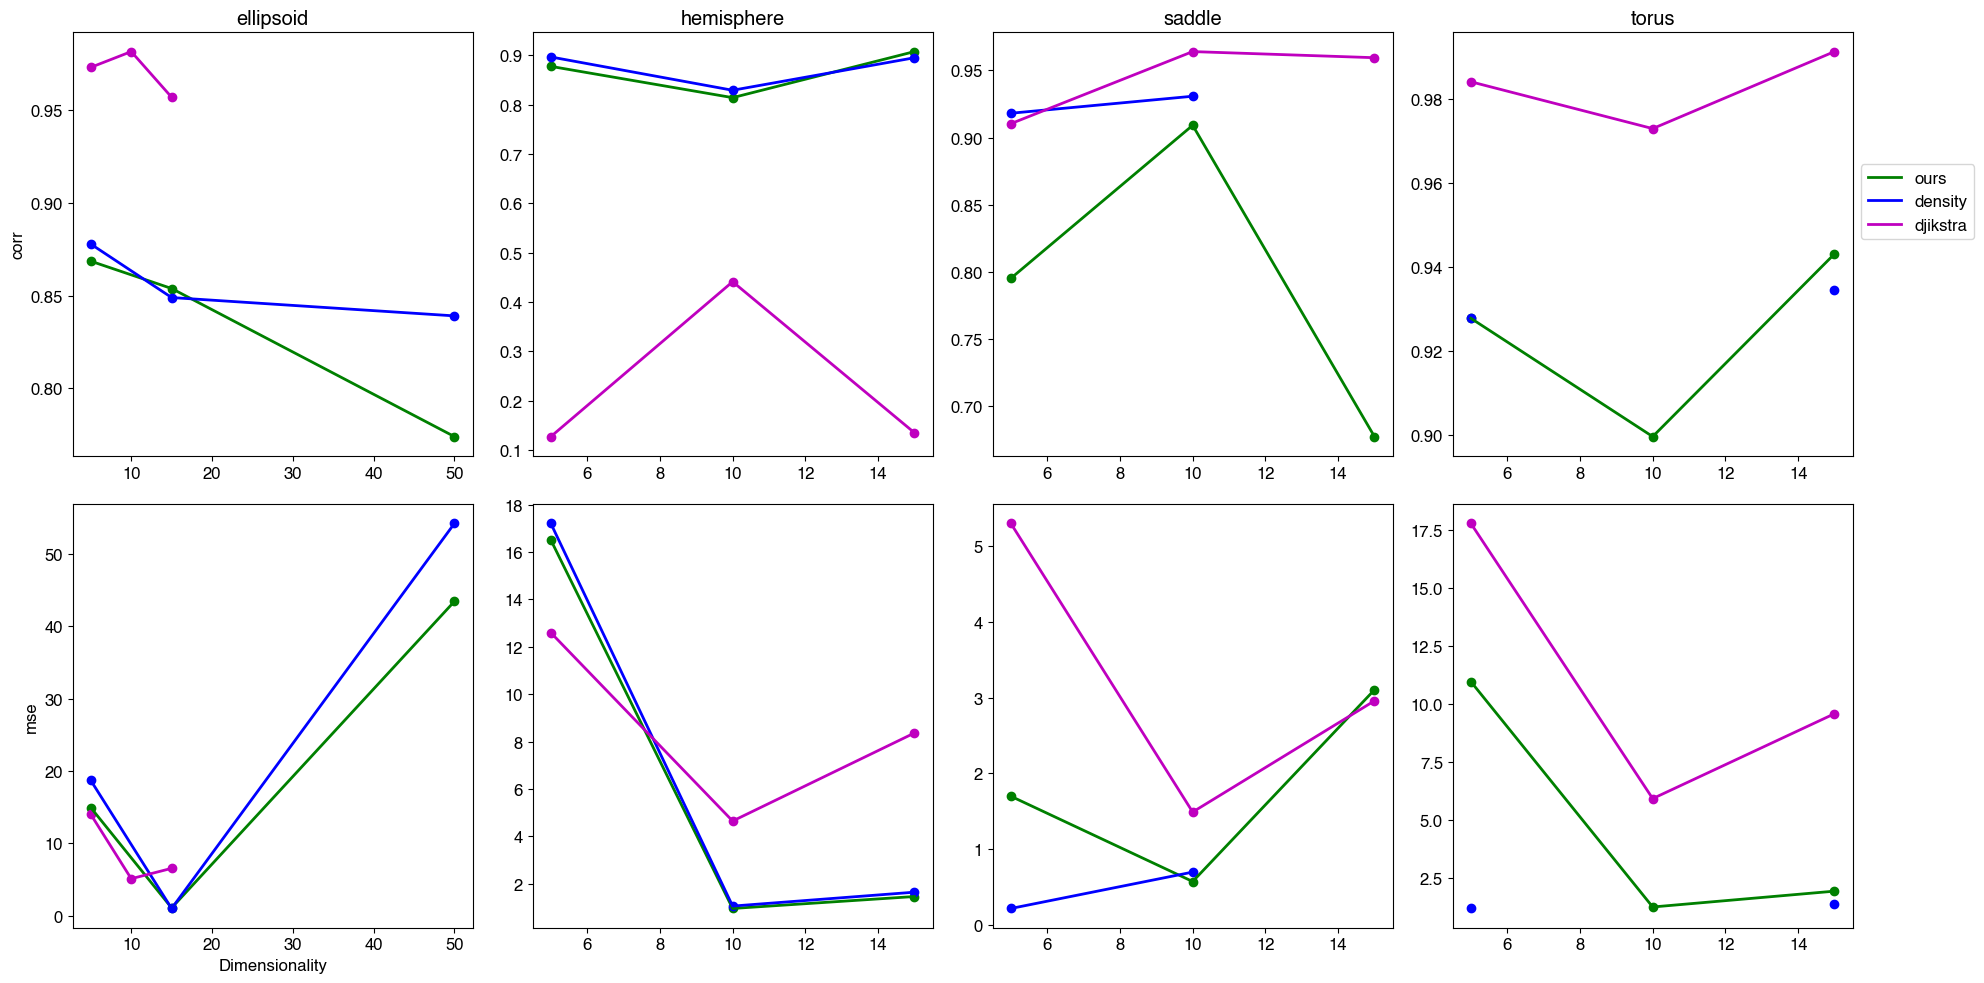

In [12]:
# Experiment 2: Increasing dimensionality
# toy_[none, 5, 10, 15, 50]_0.1
# each method is different color, each dataset is different line
# x-axis is dimensionality, y-axis is metric value
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 12

metric_names = ['corr', 'mse',]
dnames = ['ellipsoid', 'hemisphere', 'saddle', 'torus']
n_rows = len(metric_names)
n_cols = len(dnames)

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))
colors =['g', 'r', 'b', 'c', 'm', 'y']
#linestyle = ['-', '--', '-.', ':']
linestyle = ['-'] * 4
print(ax.shape)

# label dataset on the left
for i in range(0, n_cols):
    ax[0, i].set_title(dnames[i])

# label metric on the top
for j in range(0, n_rows):
    ax[j, 0].set_ylabel(metric_names[j])

for i, dname in enumerate(dnames):
    for j, method in enumerate(df['method'].unique()):
        if method in ['no density', 'phate', 'diffusion_map']:
            continue
        method_df = df[df['method'] == method]
        
        cur_df = method_df[(method_df['noise'] == '0.1') & (method_df['data_name'].str.contains(dname))]
        
        dims = list(cur_df['dim'])
        dims = np.array(dims).astype(int)
        dims.sort()

        #print(method, dname, len(dims))
        for k, metric in enumerate(metric_names):
            ys = []
            #print('dims:', dims)
            for dim in dims:
                ys.append(cur_df[cur_df['data_name'].str.contains(str(dim))][metric].mean())

            #print(noises, np.mean(ys))
            num_dims = 4
            x = np.array(dims)[:num_dims]
            ys = np.array(ys)[:num_dims]
            ax[k,i].scatter(x, ys, color=colors[j])

            ax[k,i].plot(x, ys, 
                       label=f'{method}', color=colors[j], linestyle=linestyle[i], linewidth=2)
            

# share legend for all plots, on the right side
ax[0, -1].legend(loc='center left', bbox_to_anchor=(1, 0.60))
ax[-1, 0].set_xlabel('Dimensionality')

plt.tight_layout()
plt.savefig('dimensionality_geodesic.pdf')

In [13]:
# add column data to each row
df['data'] = df['data_name'].apply(lambda x:  x.split('_')[0])


In [15]:
df

,Unnamed: 0,data_name,method,corr,mse,dist2geod,pearson_corr,pearson_p,spearman_corr,spearman_p,noise,dim,data
0,0.0,hemisphere_none_0,ours,0.985418,0.029196,0.006119,NaN,NaN,NaN,NaN,0,3,hemisphere
1,1.0,hemisphere_none_0,no density,0.889773,0.336188,0.066681,NaN,NaN,NaN,NaN,0,3,hemisphere
2,2.0,hemisphere_none_0,density,0.907905,0.292970,0.029276,NaN,NaN,NaN,NaN,0,3,hemisphere
3,0.0,ellipsoid_none_0,ours,0.970732,0.463778,0.030909,NaN,NaN,NaN,NaN,0,3,ellipsoid
4,1.0,ellipsoid_none_0,no density,0.845562,2.448624,0.108429,NaN,NaN,NaN,NaN,0,3,ellipsoid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,NaN,torus_none_0.1,djikstra,0.985577,0.406561,NaN,0.985577,2.434935e-15,0.980451,3.689359e-14,0.1,3,torus
140,NaN,torus_none_0.1,phate,0.920050,25.230882,NaN,0.920050,9.457724e-09,0.947368,2.429729e-10,0.1,3,torus
141,NaN,torus_none_0,diffusion_map,0.937872,13.469770,NaN,0.937872,1.044074e-09,0.888722,1.648527e-07,0,3,torus
142,NaN,torus_none_0,djikstra,0.996174,0.088025,NaN,0.996174,1.646743e-20,0.987970,4.798484e-16,0,3,torus


In [17]:
# group by method and data_name, and take the mean of the metrics
small_df = df[(df['method'] != 'phate') & (df['method'] != 'diffusion_map')]
small_df = small_df[small_df['dim'] != '50']
small_df = small_df[small_df['noise'] != '0.7']
small_df = small_df[small_df['noise'] != '0.9']
small_df = small_df[small_df['noise'] != '0.5']

# only take 'mse' column
grouped = small_df[['method', 'data', 'mse']].groupby(['method', 'data']).mean()
grouped


mse
method     data                  
density    ellipsoid     5.359499
           hemisphere    0.599971
           saddle        5.296767
           torus         5.386540
djikstra   ellipsoid     4.039187
           hemisphere    4.838489
           saddle        1.873240
           torus         5.017424
no density ellipsoid   143.699826
           hemisphere   43.147613
           saddle       55.593456
           torus       271.840415
ours       ellipsoid     3.761696
           hemisphere    0.470777
           saddle        4.119748
           torus         4.098413

In [24]:
# std
grouped_std = small_df[['method', 'data', 'mse']].groupby(['method', 'data']).std()
grouped_std = grouped_std.reset_index()
grouped_std

,method,data,mse
0,density,ellipsoid,8.975444
1,density,hemisphere,0.610952
2,density,saddle,12.339796
3,density,torus,9.483594
4,djikstra,ellipsoid,6.556433
5,djikstra,hemisphere,6.224598
6,djikstra,saddle,3.450030
7,djikstra,torus,7.916124
8,no density,ellipsoid,246.510593
9,no density,hemisphere,65.704642


In [22]:
# sort by mse
grouped = grouped.reset_index()
grouped = grouped.sort_values('mse')
for dname in grouped['data'].unique():
    print(dname)
    print(grouped[grouped['data'] == dname].sort_values('mse')[['method', 'mse']])
    # std
    print('=====================')

hemisphere
        method        mse
13        ours   0.470777
1      density   0.599971
5     djikstra   4.838489
9   no density  43.147613
saddle
        method        mse
6     djikstra   1.873240
14        ours   4.119748
2      density   5.296767
10  no density  55.593456
ellipsoid
        method         mse
12        ours    3.761696
4     djikstra    4.039187
0      density    5.359499
8   no density  143.699826
torus
        method         mse
15        ours    4.098413
7     djikstra    5.017424
3      density    5.386540
11  no density  271.840415


In [38]:
# sort on corr
for dname in grouped['data'].unique():
    print(dname)
    print(grouped[grouped['data'] == dname].sort_values('corr')[['method', 'corr', ]])
    print('=====================')

ellipsoid
        method      corr
8   no density  0.619221
0      density  0.874772
12        ours  0.900045
4     djikstra  0.967284
hemisphere
        method      corr
5     djikstra  0.183441
9   no density  0.468650
1      density  0.894797
13        ours  0.923617
saddle
        method      corr
10  no density  0.821439
14        ours  0.846646
2      density  0.857136
6     djikstra  0.948890
torus
        method      corr
11  no density  0.710182
3      density  0.920646
15        ours  0.924532
7     djikstra  0.979789
